In [27]:
import pandas as pd
web = pd.read_csv('UofS_access_log.csv', header=None, sep=" ", error_bad_lines=False,encoding_errors='ignore', engine='python',decimal='.')
web

C:\Users\filip\AppData\Local\Temp\ipykernel_27488\3703492191.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  web = pd.read_csv('UofS_access_log.csv', header=None, sep=" ", error_bad_lines=False,encoding_errors='ignore', engine='python',decimal='.')
Skipping line 990900: ' ' expected after '"'
Skipping line 993113: ' ' expected after '"'


,0,1,2,3,4,5,6,7
0,202.32.92.47,-,-,[01/Jun/1995:00:00:59,-0600],GET /~scottp/publish.html,200,271
1,ix-or7-27.ix.netcom.com,-,-,[01/Jun/1995:00:02:51,-0600],GET /~ladd/ostriches.html,200,205908
2,ram0.huji.ac.il,-,-,[01/Jun/1995:00:05:44,-0600],GET /~scottp/publish.html,200,271
3,eagle40.sasknet.sk.ca,-,-,[01/Jun/1995:00:08:06,-0600],GET /~lowey/,200,1116
4,eagle40.sasknet.sk.ca,-,-,[01/Jun/1995:00:08:19,-0600],GET /~lowey/kevin.gif,200,49649
...,...,...,...,...,...,...,...,...
2408618,ix-oly-wa2-11.ix.netcom.com,-,-,[31/Dec/1995:23:57:00,-0600],GET /~scottp/publish.html,200,271
2408619,freenet.npiec.on.ca,-,-,[31/Dec/1995:23:58:06,-0600],GET /~scottp/free.html,200,23067
2408620,moondog.usask.ca,-,-,[31/Dec/1995:23:58:29,-0600],GET /HTTP/1.0,200,3890
2408621,moondog.usask.ca,-,-,[31/Dec/1995:23:58:37,-0600],GET /search.htmlHTTP/1.0,200,1838


In [28]:
ws = pd.DataFrame({'domain':web[0],'timestamp':web[3],'request':web[5],'response code':web[6],'response length':web[7]})
ws

,domain,timestamp,request,response code,response length
0,202.32.92.47,[01/Jun/1995:00:00:59,GET /~scottp/publish.html,200,271
1,ix-or7-27.ix.netcom.com,[01/Jun/1995:00:02:51,GET /~ladd/ostriches.html,200,205908
2,ram0.huji.ac.il,[01/Jun/1995:00:05:44,GET /~scottp/publish.html,200,271
3,eagle40.sasknet.sk.ca,[01/Jun/1995:00:08:06,GET /~lowey/,200,1116
4,eagle40.sasknet.sk.ca,[01/Jun/1995:00:08:19,GET /~lowey/kevin.gif,200,49649
...,...,...,...,...,...
2408618,ix-oly-wa2-11.ix.netcom.com,[31/Dec/1995:23:57:00,GET /~scottp/publish.html,200,271
2408619,freenet.npiec.on.ca,[31/Dec/1995:23:58:06,GET /~scottp/free.html,200,23067
2408620,moondog.usask.ca,[31/Dec/1995:23:58:29,GET /HTTP/1.0,200,3890
2408621,moondog.usask.ca,[31/Dec/1995:23:58:37,GET /search.htmlHTTP/1.0,200,1838


## Q1
Which response code is most common? On the basis of which frequencies can you see
this?

In [29]:
ws['response code'].value_counts(dropna=False).sort_index()

200    2193516
302      40716
304     151634
400        730
401         98
403        406
404      20962
500        541
501         20
Name: response code, dtype: int64

Absolute freq

## Q2
What percentage of the requests contain a response code larger than 200?  Based on
which frequencies can you calculate this?

In [30]:
(ws[ws['response code']>200]['response code'].count()/ws['response code'].count())*100

8.930704390018695

code 200 percentage


## Q3
How many times does a response code 401 occur?  Based on which frequencies can you
see this?  What does this response code mean?

In [31]:
ws[ws['response code']==401]['response code'].value_counts(dropna=False).sort_index()

401    98
Name: response code, dtype: int64

401 is "Unauthorized" and means that someone tried to log in
with the wrong data

## Q4
Which web pages have a response code 401?

In [32]:
ws[ws['response code']==401]['domain'].unique()

array(['suncap.usask.ca', 'cwis.usask.ca', 'skynet.usask.ca',
       'mercury115.terraport.net', 'ppp-4.pbmo.net', 's066n213.csun.edu',
       'louie.csun.edu', 'lithos.usask.ca', 'heidelberg.cle.ab.com',
       'sask.usask.ca', 'oa-c212-1.sheridanc.on.ca', 'duke.usask.ca',
       'andora.usask.ca', '198.169.132.92', 'pe4480.usask.ca',
       'piglet.usask.ca', 'dcs3017.usask.ca', 'manitou1_5.usask.ca',
       'humulus_lupulus.usask.ca'], dtype=object)

## Q5
Which clients (domains) tried to consult a web page without authorization?

In [33]:
ws[ws['response code']==401]['domain'].unique()

array(['suncap.usask.ca', 'cwis.usask.ca', 'skynet.usask.ca',
       'mercury115.terraport.net', 'ppp-4.pbmo.net', 's066n213.csun.edu',
       'louie.csun.edu', 'lithos.usask.ca', 'heidelberg.cle.ab.com',
       'sask.usask.ca', 'oa-c212-1.sheridanc.on.ca', 'duke.usask.ca',
       'andora.usask.ca', '198.169.132.92', 'pe4480.usask.ca',
       'piglet.usask.ca', 'dcs3017.usask.ca', 'manitou1_5.usask.ca',
       'humulus_lupulus.usask.ca'], dtype=object)

## Q6
Which client (domain) most often attempted to access an unauthorized web page?

In [34]:
ws[ws['response code']==401]['domain'].value_counts()

skynet.usask.ca              25
cwis.usask.ca                20
duke.usask.ca                17
mercury115.terraport.net      6
andora.usask.ca               6
suncap.usask.ca               5
manitou1_5.usask.ca           3
ppp-4.pbmo.net                2
s066n213.csun.edu             2
dcs3017.usask.ca              2
piglet.usask.ca               2
198.169.132.92                1
pe4480.usask.ca               1
sask.usask.ca                 1
oa-c212-1.sheridanc.on.ca     1
heidelberg.cle.ab.com         1
lithos.usask.ca               1
louie.csun.edu                1
humulus_lupulus.usask.ca      1
Name: domain, dtype: int64

## Q7
Make a pie chart of the response codes that are not equal to 2

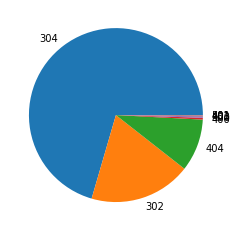

In [35]:
import matplotlib.pyplot as plt
values = ws[ws['response code']!=200]['response code'].value_counts()
labels = ws[ws['response code']!=200]['response code'].unique()
plt.figure()
plt.pie(values,labels=labels)
plt.show()

In [36]:
ws[ws['response code']!=200]['response code'].value_counts()

304    151634
302     40716
404     20962
400       730
500       541
403       406
401        98
501        20
Name: response code, dtype: int64

In [37]:
ws[ws['response code']!=200]['response code'].unique()

array([304, 302, 404, 400, 500, 403, 501, 401], dtype=int64)

## Q8
Create a bar graph of the same response codes.  Notice the difference in readability
between this and the previous image. 

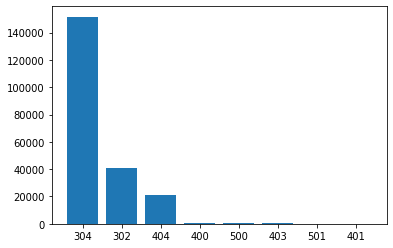

In [38]:
plt.figure()
labels = [str(label) for label in labels]
plt.bar(labels,values)
plt.show()

## Q9
Which response code was send most according to the bar chart? What does this
response code mean?


304
This code was sent the most (other than 200).  These are requests from browsers that
track previous versions of web pages. 


## Q10
How big is the longest response that was sent? Which file was sent here?

In [ ]:
ws['response length'].

In [40]:
ws[ws['response length']==ws['response length'].max()]['request']

1148286                     POST /cgi-bin/phone.plHTTP/1.0
1228838                     POST /cgi-bin/phone.plHTTP/1.0
1273349                     POST /cgi-bin/phone.plHTTP/1.0
1335642                     POST /cgi-bin/phone.plHTTP/1.0
1450449                     POST /cgi-bin/phone.plHTTP/1.0
1742864                     POST /cgi-bin/phone.plHTTP/1.0
1887398                     POST /cgi-bin/phone.plHTTP/1.0
1979369                     POST /cgi-bin/phone.plHTTP/1.0
1979371                     POST /cgi-bin/phone.plHTTP/1.0
2187996                     POST /cgi-bin/phone.plHTTP/1.0
2210254    GET /cgi-bin/phone.pl?query=engineeringHTTP/1.0
2277987                     POST /cgi-bin/phone.plHTTP/1.0
2278003                     POST /cgi-bin/phone.plHTTP/1.0
Name: request, dtype: object

#### ????????

## Q11
Select all lines where response_length is smaller than 30,000 bytes.  Make classes of
the response_length with class width equal to 1000 bytes, where the left border always
belongs to the class.  How many responses have a length smaller than 1000 bytes?

In [41]:
q11 = ws[ws['response length']<30000]['response length']
cutpoints=range(q11.min(),q11.max()+1000,1000)
q11=pd.cut(q11,bins=cutpoints,include_lowest=True)
q11

TypeError: '<' not supported between instances of 'str' and 'int'